# **Importando base de dados** 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# **Renomeando nossas colunas: Traducao**

In [3]:
df.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [4]:
renomear = {'total_bill' : 'valor_conta',
            'tip' : 'gorjeta',
            'dessert' : 'sobremesa',
            'day' : 'dia_semana',
            'time' : 'hora_dia',
            'size' : 'total_pessoas'}



In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
gorjetas = df.rename(columns = renomear)

In [7]:
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia_semana,hora_dia,total_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [8]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [9]:
sim_nao = {'No' : 'Nao',
           'Yes' : 'Sim'}

In [10]:
gorjetas.sobremesa.map(sim_nao)

0      Nao
1      Nao
2      Nao
3      Nao
4      Nao
      ... 
239    Nao
240    Sim
241    Sim
242    Nao
243    Nao
Name: sobremesa, Length: 244, dtype: object

In [11]:
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia_semana,hora_dia,total_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [12]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [13]:
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia_semana,hora_dia,total_pessoas
0,16.99,1.01,Nao,Sun,Dinner,2
1,10.34,1.66,Nao,Sun,Dinner,3
2,21.01,3.50,Nao,Sun,Dinner,3
3,23.68,3.31,Nao,Sun,Dinner,2
4,24.59,3.61,Nao,Sun,Dinner,4


In [14]:
gorjetas.dia_semana.unique() # ou gorjetas['dia_semana'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [15]:
dias = {
    'Sun': 'Domingo',
        'Sat': 'Sabado',
        'Thur': 'Quinta',
        'Fri': 'Sexta'
        }

In [16]:
gorjetas.dia_semana = gorjetas.dia_semana.map(dias)

In [17]:
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia_semana,hora_dia,total_pessoas
0,16.99,1.01,Nao,Domingo,Dinner,2
1,10.34,1.66,Nao,Domingo,Dinner,3
2,21.01,3.50,Nao,Domingo,Dinner,3
3,23.68,3.31,Nao,Domingo,Dinner,2
4,24.59,3.61,Nao,Domingo,Dinner,4


In [18]:
gorjetas.hora_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [19]:
hora = {
    'Dinner': 'Jantar',
    'Lunch': 'Almoco'
}

In [20]:
gorjetas.hora_dia = gorjetas.hora_dia.map(hora)

In [21]:
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia_semana,hora_dia,total_pessoas
0,16.99,1.01,Nao,Domingo,Jantar,2
1,10.34,1.66,Nao,Domingo,Jantar,3
2,21.01,3.50,Nao,Domingo,Jantar,3
3,23.68,3.31,Nao,Domingo,Jantar,2
4,24.59,3.61,Nao,Domingo,Jantar,4


# **Gerando graficos estatisticos: Seaborn**

## Importando o Seaborn

In [22]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 208 kB 5.0 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [23]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: scipy, matplotlib, pandas, numpy
Required-by: missingno


# **Analise 1 - Valor da conta e gorjeta**

In [25]:
gorjetas.columns

Index(['valor_conta', 'gorjeta', 'sobremesa', 'dia_semana', 'hora_dia',
       'total_pessoas'],
      dtype='object')

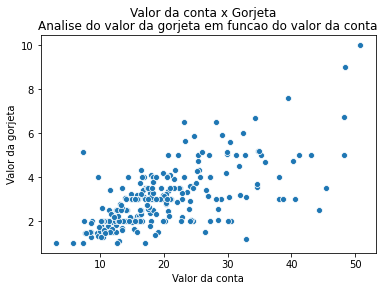

In [41]:
valor_gorjeta = sns.scatterplot(x='valor_conta', y='gorjeta', data=gorjetas)
valor_gorjeta.figure.suptitle('Valor da conta x Gorjeta')
valor_gorjeta.set_title('Analise do valor da gorjeta em funcao do valor da conta')
valor_gorjeta.set(xlabel='Valor da conta', ylabel='Valor da gorjeta')

imagem = valor_gorjeta.get_figure()
imagem.savefig('valor_gorjeta.png')


**Visualmente, o valor da gorjeta aumenta de acordo com o valor da conta**.

In [27]:
print('A base de dados contem {} registros \n'.format(gorjetas.shape[0]))
print('Registros nao nulos')
gorjetas.count()

A base de dados contem 244 registros 

Registros nao nulos


valor_conta      244
gorjeta          244
sobremesa        244
dia_semana       244
hora_dia         244
total_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [28]:
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia_semana,hora_dia,total_pessoas
0,16.99,1.01,Nao,Domingo,Jantar,2
1,10.34,1.66,Nao,Domingo,Jantar,3
2,21.01,3.50,Nao,Domingo,Jantar,3
3,23.68,3.31,Nao,Domingo,Jantar,2
4,24.59,3.61,Nao,Domingo,Jantar,4


In [29]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_conta']

In [30]:
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia_semana,hora_dia,total_pessoas,porcentagem
0,16.99,1.01,Nao,Domingo,Jantar,2,0.059447
1,10.34,1.66,Nao,Domingo,Jantar,3,0.160542
2,21.01,3.50,Nao,Domingo,Jantar,3,0.166587
3,23.68,3.31,Nao,Domingo,Jantar,2,0.139780
4,24.59,3.61,Nao,Domingo,Jantar,4,0.146808


In [31]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [32]:
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia_semana,hora_dia,total_pessoas,porcentagem
0,16.99,1.01,Nao,Domingo,Jantar,2,0.06
1,10.34,1.66,Nao,Domingo,Jantar,3,0.16
2,21.01,3.50,Nao,Domingo,Jantar,3,0.17
3,23.68,3.31,Nao,Domingo,Jantar,2,0.14
4,24.59,3.61,Nao,Domingo,Jantar,4,0.15


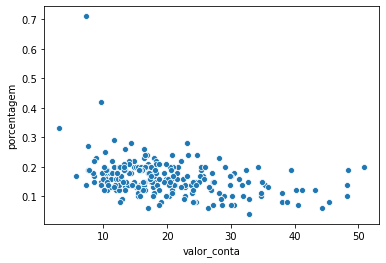

In [33]:
porcentagem_conta = sns.scatterplot(x='valor_conta', y='porcentagem', data=gorjetas)

**Visualmente o valor da conta nao e proporcional ao valor da gorjeta**

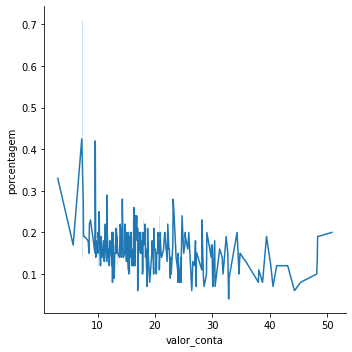

In [34]:
porcentagem_conta_linha = sns.relplot(x='valor_conta', y='porcentagem', kind='line', data=gorjetas)

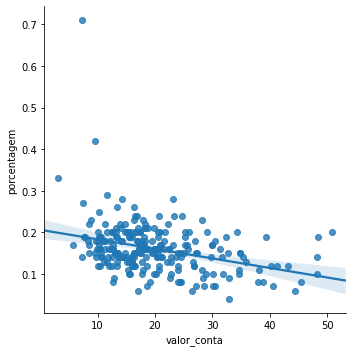

In [35]:
sns.lmplot(x='valor_conta', y='porcentagem', data=gorjetas)

# **Analise 2 - Sobremesa**

In [42]:
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia_semana,hora_dia,total_pessoas,porcentagem
0,16.99,1.01,Nao,Domingo,Jantar,2,0.06
1,10.34,1.66,Nao,Domingo,Jantar,3,0.16
2,21.01,3.50,Nao,Domingo,Jantar,3,0.17
3,23.68,3.31,Nao,Domingo,Jantar,2,0.14
4,24.59,3.61,Nao,Domingo,Jantar,4,0.15


In [44]:
gorjetas[gorjetas.sobremesa=='Sim'].describe()

,valor_conta,gorjeta,total_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [45]:
gorjetas[gorjetas.sobremesa=='Nao'].describe()

,valor_conta,gorjeta,total_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


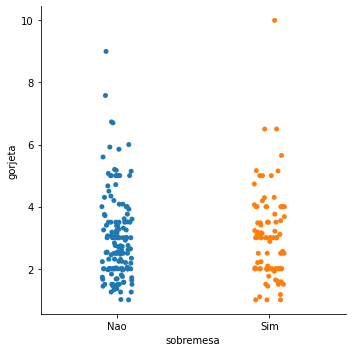

In [46]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

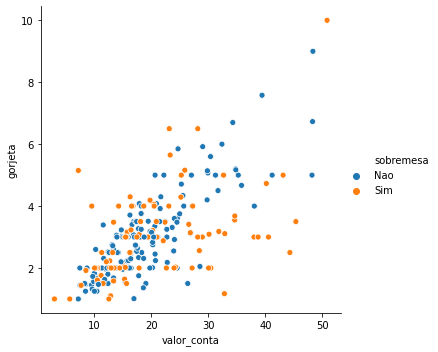

In [47]:
sns.relplot(x='valor_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

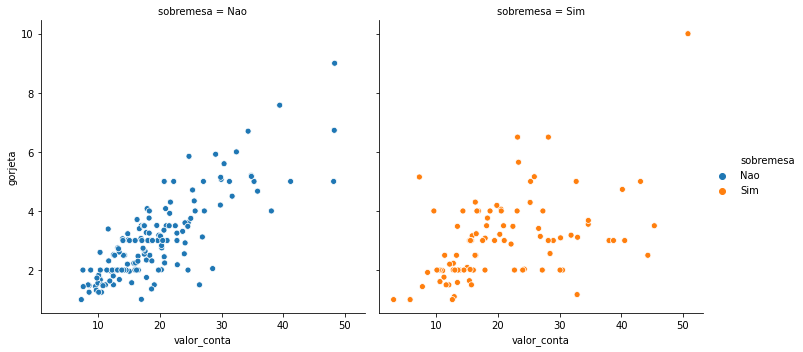

In [48]:
sns.relplot(x='valor_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

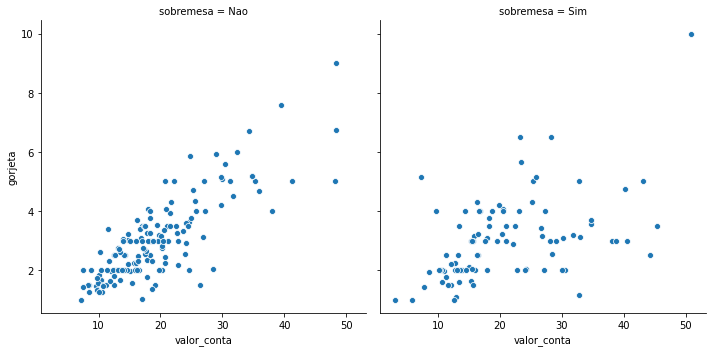

In [49]:
sns.relplot(x='valor_conta', y='gorjeta', col='sobremesa', data=gorjetas)

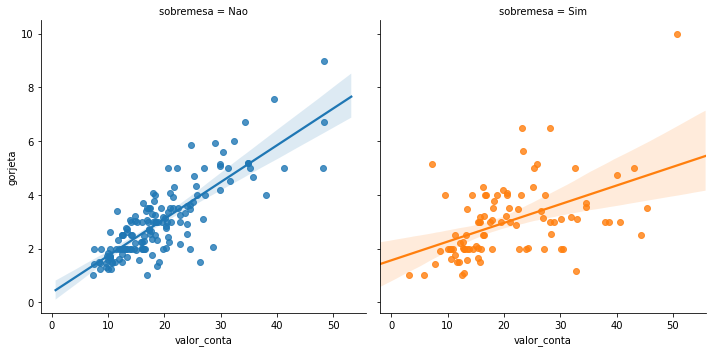

In [50]:
sns.lmplot(x='valor_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

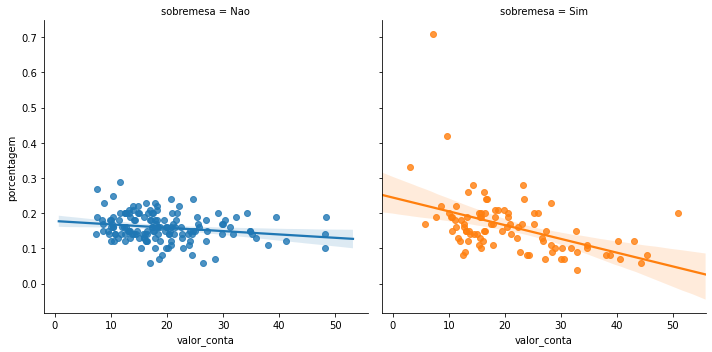

In [51]:
sns.lmplot(x='valor_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

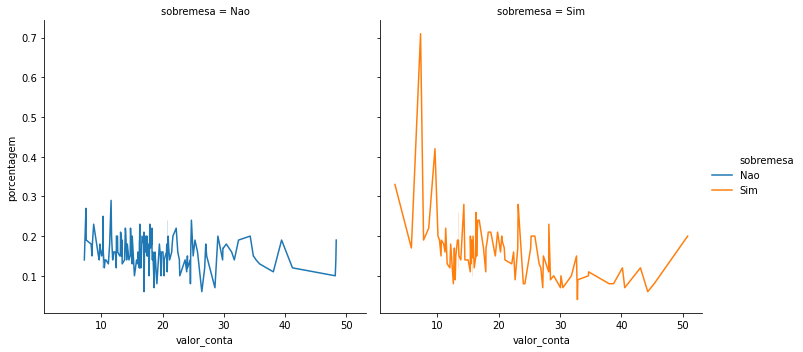

In [53]:
sns.relplot(x='valor_conta', y='porcentagem', hue='sobremesa', col='sobremesa', kind='line', data=gorjetas)

**Visualmente, existe uma diferenca no valor da gorjeta daqueles que pediram sobremesa e nao pediram sobremesa**.

## **Teste de hipotese**

**H<sup>null</sup>**

> **A distribuicao da taxa da gorjeta e a mesma nos dois grupos**

**H<sup>alt</sup>**

> **A distribuicao da taxa da gorjeta nao e a mesma nos dois grupos**

In [54]:
from scipy.stats import ranksums

In [56]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [57]:
sem_sobremesa = gorjetas.query("sobremesa == 'Nao'").porcentagem

In [58]:
sem_sobremesa

0      0.06
1      0.16
2      0.17
3      0.14
4      0.15
       ... 
235    0.12
238    0.13
239    0.20
242    0.10
243    0.16
Name: porcentagem, Length: 151, dtype: float64

In [60]:
r = ranksums(sobremesa, sem_sobremesa)

In [64]:
print('O valor do p-value e {}'.format(r.pvalue))

O valor do p-value e 0.5266635660124415


**H<sup>null</sup>**

> **A distribuicao da taxa da gorjeta e a mesma nos dois grupos**

# **Analise 3 - Dia da Semana**

In [68]:
gorjetas.dia_semana.unique()

array(['Domingo', 'Sabado', 'Quinta', 'Sexta'], dtype=object)

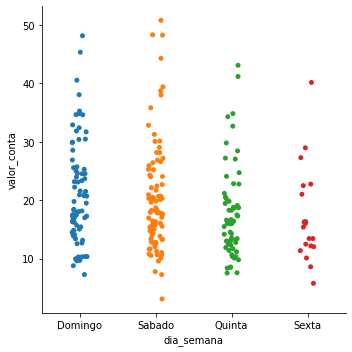

In [69]:
sns.catplot(x='dia_semana', y='valor_conta', data=gorjetas)

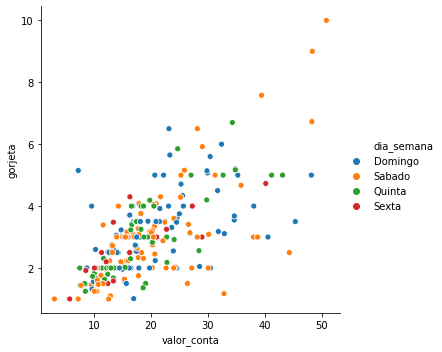

In [71]:
sns.relplot(x='valor_conta', y='gorjeta', hue='dia_semana', data=gorjetas)

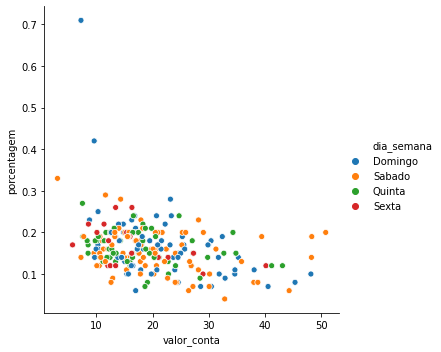

In [72]:
sns.relplot(x='valor_conta', y='porcentagem', hue='dia_semana', data=gorjetas)

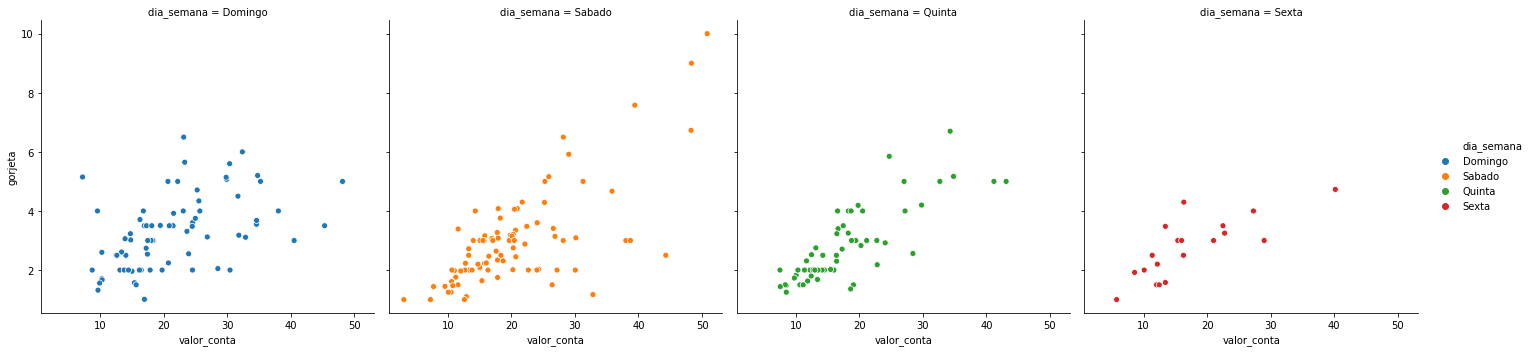

In [75]:
sns.relplot(x='valor_conta', y='gorjeta', hue='dia_semana', col='dia_semana', data=gorjetas)

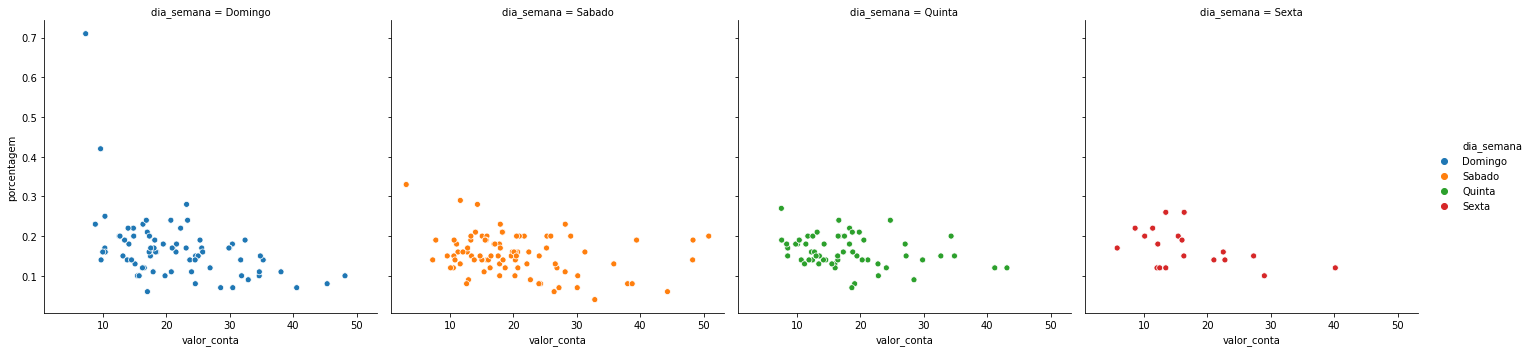

In [76]:
sns.relplot(x='valor_conta', y='porcentagem', hue='dia_semana', col='dia_semana', data=gorjetas)

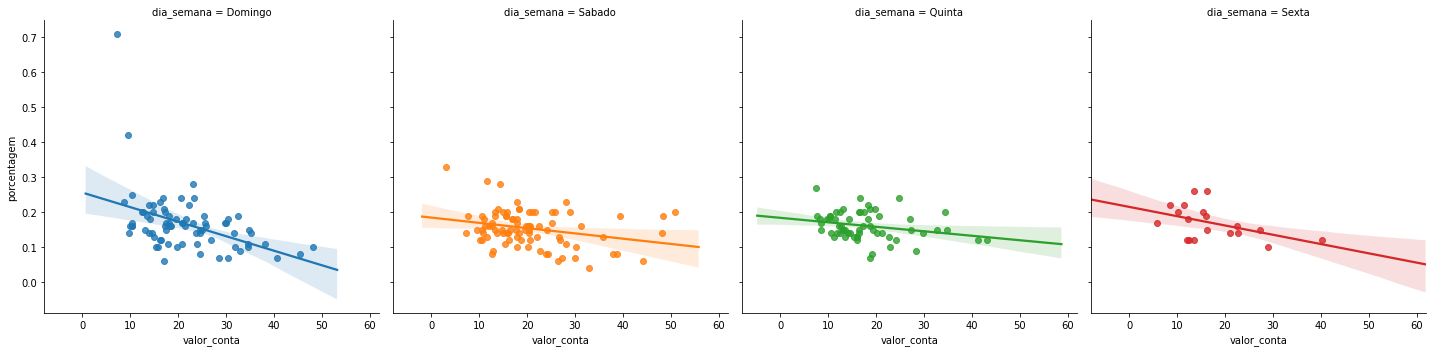

In [77]:
sns.lmplot(x='valor_conta', y='porcentagem', hue='dia_semana', col='dia_semana', data=gorjetas)

In [79]:
media_geral_gorjeta = gorjetas.gorjeta.mean()

In [82]:
print('A media geral das gorjetas e de {}'.format(media_geral_gorjeta))

A media geral das gorjetas e de 2.9982786885245902


In [84]:
gorjetas.groupby(['dia_semana']).mean()[['valor_conta', 'gorjeta', 'porcentagem']]

,valor_conta,gorjeta,porcentagem
dia_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sabado,20.441379,2.993103,0.153678
Sexta,17.151579,2.734737,0.169474


In [86]:
print('Frequencia dos dias')
gorjetas.dia_semana.value_counts()

Frequencia dos dias


Sabado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_semana, dtype: int64

## **Teste de hipotese**

**H<sup>null</sup>**
> **A distribuicao do valor da conta e igual no sabado e no domingo**

**H<sup>alt</sup>**
> **A distribuicao do valor da conta nao e igual no sabado e no domingo**

In [90]:
valor_conta_domingo = gorjetas.query("dia_semana == 'Domingo'").valor_conta

In [91]:
valor_conta_sabado = gorjetas.query("dia_semana == 'Sabado'").valor_conta

In [95]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print('O valor do p-value e {}'.format(r2.pvalue))

O valor do p-value e 0.3576728477868443


**H<sup>null</sup>**
> **A distribuicao do valor da conta e igual no sabado e no domingo**


In [96]:
valor_conta_quinta = gorjetas.query("dia_semana == 'Quinta'").valor_conta

In [97]:
valor_conta_sexta = gorjetas.query("dia_semana == 'Sexta'").valor_conta

In [100]:
r3 = ranksums(valor_conta_quinta, valor_conta_sexta)
print('O valor do p-value e {}'.format(r3.pvalue))

O valor do p-value e 0.6436866015150163


# **Analise 4 - Hora do dia**

In [101]:
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia_semana,hora_dia,total_pessoas,porcentagem
0,16.99,1.01,Nao,Domingo,Jantar,2,0.06
1,10.34,1.66,Nao,Domingo,Jantar,3,0.16
2,21.01,3.50,Nao,Domingo,Jantar,3,0.17
3,23.68,3.31,Nao,Domingo,Jantar,2,0.14
4,24.59,3.61,Nao,Domingo,Jantar,4,0.15


In [102]:
gorjetas.hora_dia.unique()

array(['Jantar', 'Almoco'], dtype=object)

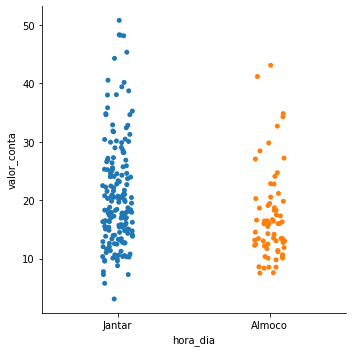

In [103]:
sns.catplot(x='hora_dia', y='valor_conta', data=gorjetas)

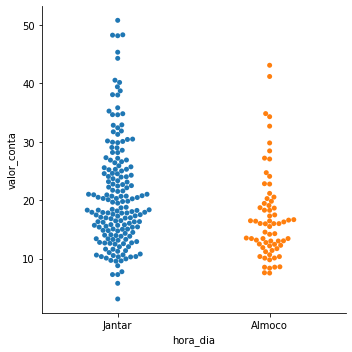

In [106]:
sns.catplot(x='hora_dia', y='valor_conta', kind='swarm', data=gorjetas)

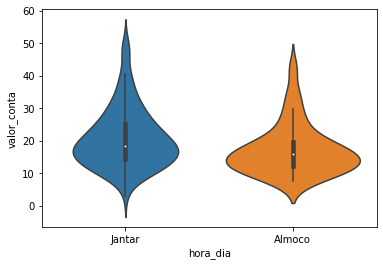

In [107]:
sns.violinplot(x='hora_dia', y='valor_conta', data=gorjetas)

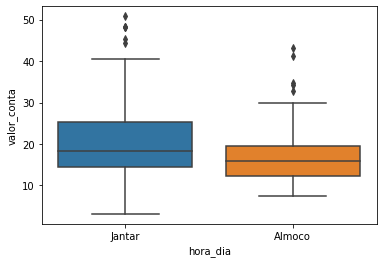

In [108]:
sns.boxplot(x='hora_dia', y='valor_conta', data=gorjetas)

In [110]:
almoco = gorjetas.query("hora_dia == 'Almoco'").valor_conta

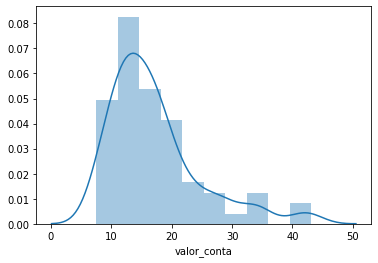

In [111]:
sns.distplot(almoco)

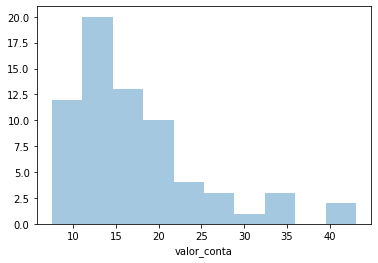

In [113]:
sns.distplot(almoco, kde=False)

In [114]:
jantar = gorjetas.query("hora_dia == 'Jantar'").valor_conta

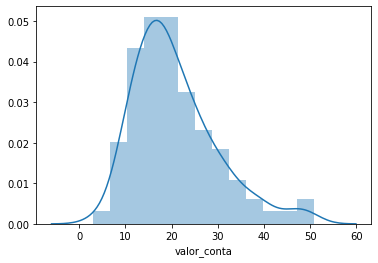

In [115]:
sns.distplot(jantar)

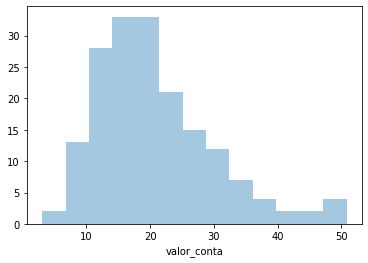

In [116]:
sns.distplot(jantar, kde=False)

In [118]:
gorjetas.groupby(['hora_dia']).mean()[['valor_conta', 'gorjeta', 'porcentagem']]

,valor_conta,gorjeta,porcentagem
hora_dia,,,
Almoco,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## **Teste de hipotese**

**H<sup>null</sup>**
> **A distribuicao do valor da conta e igual no jantar e no almoco**

**H<sup>alt</sup>**
> **A distribuicao do valor da conta nao e igual no jantar e no almoco**

In [120]:
r4 = ranksums(jantar, almoco)

In [122]:
print('O valor do p-value e de {}'.format(r4.pvalue))

O valor do p-value e de 0.0011791039723641672


**H<sup>alt</sup>**
> **A distribuicao do valor da conta nao e igual no jantar e no almoco**

## **Teste de hipotese 2**

**H<sup>null</sup>**
> **A distribuicao da taxa da gorjeta e igual no jantar e no almoco**

**H<sup>alt</sup>**
> **A distribuicao da taca da gorjeta nao e igual no jantar e no almoco**

In [124]:
porcentagem_almoco = gorjetas.query("hora_dia == 'Almoco'").porcentagem

In [125]:
porcentagem_jantar = gorjetas.query("hora_dia == 'Jantar'").porcentagem

In [129]:
r5 = ranksums(porcentagem_almoco, porcentagem_jantar)
print('O valor do p-value e de {}'.format(r5.pvalue))

O valor do p-value e de 0.2602493995587126


**H<sup>null</sup>**
> **A distribuicao da taxa da gorjeta e igual no jantar e no almoco**
